# 1. Setup Mario

In [2]:
# Import the game
import gym_super_mario_bros
# Import the Joypad wrapper
from nes_py.wrappers import JoypadSpace
# Import the SIMPLIFIED controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [3]:
# Setup game
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

# 2. Preprocess Environment

In [4]:
# Import Frame Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation
# Import Vectorization Wrappers
# Import Matplotlib to show the impact of frame stacking
from matplotlib import pyplot as plt
# Import the game
import gym_super_mario_bros
# Import the Joypad wrapper
from nes_py.wrappers import JoypadSpace
# Import the SIMPLIFIED controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [5]:
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv

In [6]:
# 1. Create the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# 2. Simplify the controls 
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# 3. Grayscale
env = GrayScaleObservation(env, keep_dim=True)
# 4. Wrap inside the Dummy Environment
env = DummyVecEnv([lambda: env])
# 5. Stack the frames
env = VecFrameStack(env, 4, channels_order='last')

In [7]:
state = env.reset()

In [8]:
state.shape

(1, 240, 256, 4)

In [9]:
state, reward, done, info = env.step([5])

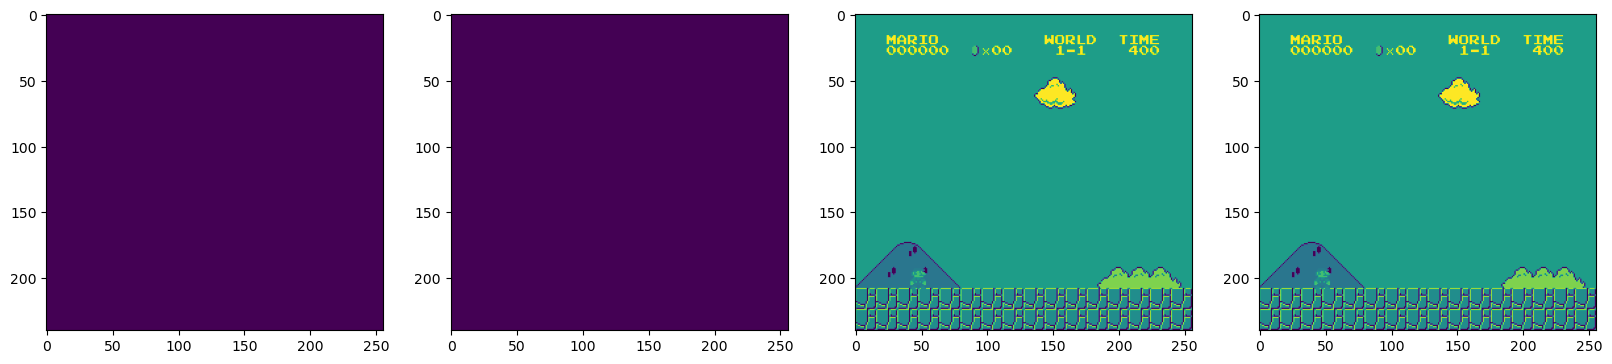

In [10]:
plt.figure(figsize=(20,16))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

# 3. Train the RL Model

In [11]:
# Import os for file path management
import os 
# Import PPO for algos
from stable_baselines3 import PPO
# Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback

In [15]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [18]:
CHECKPOINT_DIR = ''
LOG_DIR = './logs/'

In [19]:
# Setup model saving callback
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

In [ ]:
# This is the AI model started
model = PPO('MlpPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, 
            n_steps=512) 

# Train it for 10000 timesteps
model.learn(total_timesteps=10000000, callback = callback)


Using cpu device
Wrapping the env in a VecTransposeImage.


In [15]:
model.save('thisisatestmodel')

# 4. Test it Out

In [7]:
# Load model
model = PPO.load('thisisatestmodel')

In [8]:
state = env.reset()

NameError: name 'env' is not defined

In [ ]:
# Start the game 
state = env.reset()
# Loop through the game
while True: 
    
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()

2023-06-25 17:42:13.586 python[22593:5034865] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fb2738ff5b0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2023-06-25 17:42:13.587 python[22593:5034865] Warning: Expected min height of view: (<NSButton: 0x7fb02f721fc0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2023-06-25 17:42:13.588 python[22593:5034865] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fb02f70eb00>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2023-06-25 17:42:13.589 python[22593:5034865] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fb02f724880>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.


In [1]:
from stable_baselines3.common.evaluation import evaluate_policy
import time

evaluate_policy(model, env, n_eval_episodes=1, deterministic=True, render=False, return_episode_rewards=False)
episode = 1

for episode in range(1, episode+1):
    states = env.reset()
    done = False
    score = 0
    
    while not done:
        env.render()
        action, _ = model.predict(states, deterministic=True)
        states, reward, done, info = env.step(action)
        score += reward
        time.sleep(0.01)
    print('Episode:{} Score:{}'.format(episode, score))
#env.close()

NameError: name 'model' is not defined